# PROBABILE STRUTTURA
1. Caricamento dei file audio
2. Parsing del filename → estrazione emotion_id
3. Creazione DataFrame per vedere se tutto è corretto  ← QUI metti il codice
4. Generazione dei mel-spectrogram
5. Decisione dei parametri (n_mels, hop, win, durata, padding)
6. Test di un paio di augmentations


In [ ]:
#!pip install pandas


In [ ]:
import os
os.getcwd()
import sys
sys.path.append("../src")

import pandas as pd
from glob import glob
from preprocessing.dataset import extract_emotion_label, EMOTION_MAP

audio_files = glob("../data/Actor_*/*.wav", recursive=True)
print("Numero totale file:", len(audio_files))
audio_files[:3]

rows = []

for f in audio_files:
    filename = os.path.basename(f)
    parts = filename.split('-')

    emotion_id = parts[2]
    emotion_label = EMOTION_MAP[emotion_id]

    actor = parts[-1].split('.')[0]  # ultimo numero prima del .wav

    rows.append([f, emotion_id, emotion_label, actor])

df = pd.DataFrame(rows, columns=["filepath", "emotion_id", "emotion_label", "actor"])
df.head()



Numero totale file: 1440


,filepath,emotion_id,emotion_label,actor
0,../data\Actor_01\03-01-01-01-01-01-01.wav,01,neutral,01
1,../data\Actor_01\03-01-01-01-01-02-01.wav,01,neutral,01
2,../data\Actor_01\03-01-01-01-02-01-01.wav,01,neutral,01
3,../data\Actor_01\03-01-01-01-02-02-01.wav,01,neutral,01
4,../data\Actor_01\03-01-02-01-01-01-01.wav,02,calm,01


In [4]:
# Verifica della corretta popolazione del dataset

print("=== DATASET CHECK ===\n")

print(f"Totale file audio: {len(df)}\n")

print("Distribuzione emozioni:")
print(df["emotion_label"].value_counts().sort_index(), "\n")

print("Distribuzione attori:")
print(df["actor"].value_counts().sort_index(), "\n")


=== DATASET CHECK ===

Totale file audio: 1440

Distribuzione emozioni:
emotion_label
angry        192
calm         192
disgust      192
fearful      192
happy        192
neutral       96
sad          192
surprised    192
Name: count, dtype: int64 

Distribuzione attori:
actor
01    60
02    60
03    60
04    60
05    60
06    60
07    60
08    60
09    60
10    60
11    60
12    60
13    60
14    60
15    60
16    60
17    60
18    60
19    60
20    60
21    60
22    60
23    60
24    60
Name: count, dtype: int64 



In [1]:
import os
os.getcwd()
import sys
sys.path.append("../src")

torch.Size([16, 1, 64, 401]) torch.Size([16])


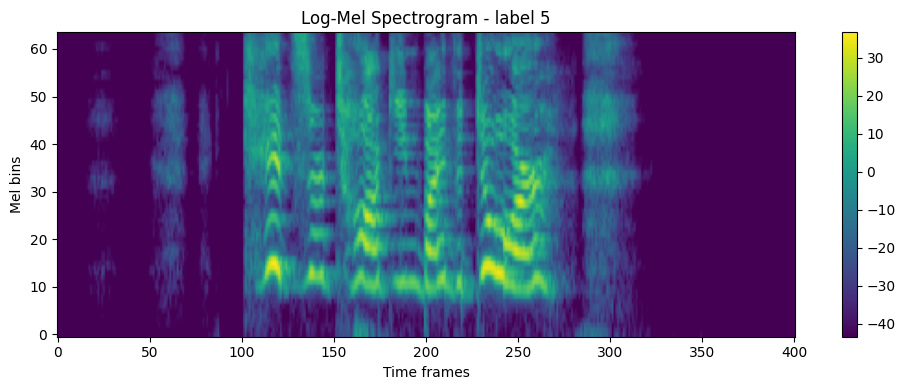

In [2]:

from torch.utils.data import DataLoader
from preprocessing.dataset import list_ravdess_files, split_by_speakers, RavdessDataset, plot_log_mel_from_loader

all_files = list_ravdess_files("../data")

train_spk = [f"{i:02d}" for i in range(1, 19)]   # 01..18
val_spk   = [f"{i:02d}" for i in range(19, 23)]  # 19..22
test_spk  = [f"{i:02d}" for i in range(23, 25)]  # 23..24

train_files, val_files, test_files = split_by_speakers(all_files, train_spk, val_spk, test_spk)

train_ds = RavdessDataset(train_files)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

X, y = next(iter(train_loader))
print(X.shape, y.shape)  # atteso: [B, 1, 64, 401]  e [B]

plot_log_mel_from_loader(train_loader)